<a href="https://colab.research.google.com/github/AryanSahu13/LWSProject1/blob/main/MinorProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aryan Sahu, Minor Project 1, Learnwik Solutions

#**Minor Project 1: Binary Classification using Artificial Neural Network**

Dataset: MNIST Handwritten digits dataset

Algorithm: Artificial Neural Network (ANN)

Methodology:

1. Load the MNIST dataset and split it into training and testing sets

2. Preprocess the data by normalizing and flattening the images

3. Build an ANN model using Keras

4. Train the model on the training set and evaluate it on the testing set

5. Visualize the model's performance using confusion matrix and classification report

Step 1: Import the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras

Step 2: Load the MNIST dataset

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Step 3: Preprocess the data

In [ ]:
# Normalize the pixel values between 0 and 1
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
X_train = X_train_full.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_full, test_size=0.2, random_state=42)

Step 4: Build the ANN model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Step 5: Compile and train the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2656 - accuracy: 0.9218 - val_loss: 0.1268 - val_accuracy: 0.9607
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.1003 - val_accuracy: 0.9690
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0775 - accuracy: 0.9755 - val_loss: 0.0895 - val_accuracy: 0.9716
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.1093 - val_accuracy: 0.9697
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0456 - accuracy: 0.9850 - val_loss: 0.0918 - val_accuracy: 0.9733
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.0863 - val_accuracy: 0.9751
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.1100 - val_accuracy:

Step 6: Evaluate the model on the testing set

In [ ]:
_, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1159 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


Step 7: Visualize the model's performance

In [ ]:
# Visualize the model's performance
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

313/313 [==============================] - 0s 1ms/step
Confusion Matrix:
[[ 967    1    2    0    1    0    5    1    3    0]
 [   0 1126    2    1    0    0    1    1    4    0]
 [   2    1 1004    8    4    0    2    3    8    0]
 [   1    0    3  996    0    0    0    1    7    2]
 [   1    1    3    0  967    0    4    2    1    3]
 [   3    0    0   36    2  820    8    1   19    3]
 [   1    3    1    2    2    3  944    0    1    1]
 [   1    6    9    4    7    0    0  990    5    6]
 [   0    0    2    5    4    2    0    3  955    3]
 [   1    2    0   12   18    0    2    5   10  959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.94      0.99      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.92      0.96    

Step 8: Plot the accuracy and loss curves

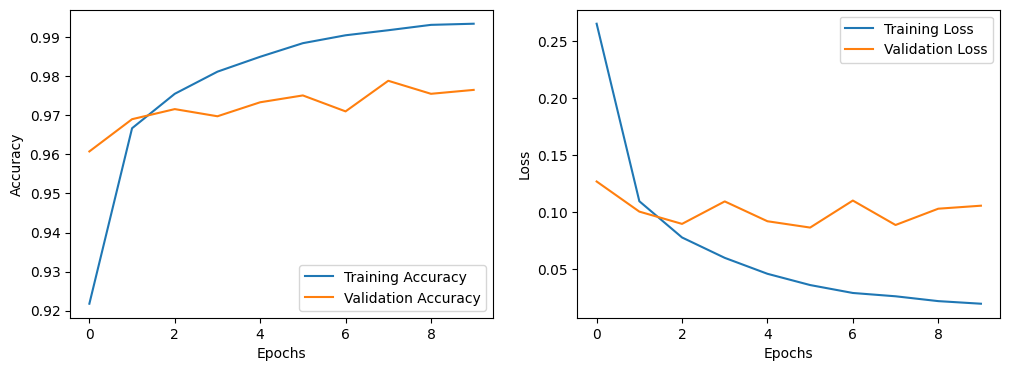

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()